<a href="https://colab.research.google.com/github/JuanPabloArriagada/FML/blob/main/G1_FMY0100_E3_Clasificacio%CC%81n_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 3

**Integrantes:**

+ Integrante 1: Juan Pablo Arriagada : ju.arriagadar@duocuc.cl
+ Integrante 2: Carlos Soto : car.sotoa@duocuc.cl
+ Integrante 3: Jose Toledo : jo.toledoo@duocuc.cl

**Fecha de Entrega:** 24 Noviembre 2025 antes de las 21:00  


---

## Descripción

Este notebook contiene el desarrollo de la evaluación 3 de la asignatura optatitva de Fundamentos de Machine Learning de la carrera Ingeniería en Informática de DuocUC - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.X. A continuación se listan las bibliotecas necesarias:

| Librería | Versión mínima | Propósito |
|----------|----------------|-----------|
| **numpy** | 1.24.0 | Operaciones numéricas y matrices |
| **pandas** | 2.0.0 | Manipulación y análisis de datos |
| **matplotlib** | 3.7.0 | Visualización de gráficos |
| **seaborn** | 0.12.0 | Visualización estadística avanzada |
| **scikit-learn** | 1.3.0 | Machine Learning (pipelines, preprocesamiento, modelos) |


Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de numpy usas:

```python
import numpy
print(numpy.__version__)
````

In [ ]:
# Descargar el archivo y guardarlo en el entorno
!wget https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv

--2025-11-24 19:40:34--  https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds [following]
--2025-11-24 19:40:35--  https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1a2aeb4b9e147ddebeb3adfe89.dl.dropboxusercontent.com/cd/0/inline/C1yS0IZjskfyLdVnm9MTzMC60Q_iGyqreYFug_i9jBnTbDFeEiB8JmFsojlN9yh9zNvtKm0SSDjDmuTZH449nAViaEaC8qnVWkhXZlIeRlvYQ2godUQbKEf5PQ3Ja7fqBk4Kld8Dl5JfuOyzlRjFtTn6/file# [following]
--2025-11-24 19:40:35--  https://uc1a2aeb4b9e147ddebeb3adfe89.dl.dropboxus

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

# Requerimientos

**RQ1.** Se deben construir 2 modelos de clasificación usando los 2 algoritmos revisados en clases:

+ `LogisticRegression`
+ `SVC`
+ `DecisionTreeClassifier`
+ `RandomForest`

Los modelos predictivos deben predecir si un jugador sobrevive o no (variable `Survived`).

**RQ2.** Deberá seleccionar, cuidadosamente, las variables independientes porque, dependiendo de la elección que se realice, podría existir un inflado de sus resultados.

**RQ3.** Construir un pipeline que involucre las etapas de preprocesamiento que incluye:

+ Tratamiento de atípicos
+ Tratamiento de nulos
+ Escalado

**RQ4.** Construir CUATRO pipelines, uno para cada modelo, que permita crear el modelo a partir de su algoritmo asociado. Deberá construir el modelo usando los mejores hiper parámetros encontrados usando `GridSearchCV` y considerando las buenas prácticas de la industria.

**RQ5.** Calcular para todos los modelos construidos las siguientes métricas:

+ Accuracy
+ Precision
+ F1-score
+ Recall
+ Matriz de confusión

**RQ6.** Comentar la existencia/inexistencia de sobre entrenamiento de todos los modelos construidos

**RQ7.** Considerando todos los modelos anteriores:

+ Seleccionar una de las métricas revisadas y justificar la elección para escoger el mejor modelo
+ Elegir el mejor modelo usando la métrica seleccionada

**RQ8.** Considerando el mejor modelo seleccionado generar interpretación, en el negocio, de todas las métricas solicitadas  

**RQ9.** Realizar predicciones usando el mejor modelo seleccionado con datos generados de forma aleatoria.

In [ ]:


class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, limits=(0.05, 0.05)):
        self.limits = limits

    def fit(self, X, y=None):
        # Guardar nombres si es DataFrame, si no generar nombres genéricos
        if isinstance(X, pd.DataFrame):
            self.columns_ = X.columns
        else:
            self.columns_ = np.arange(X.shape[1])
        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=self.columns_)
        for col in self.columns_:
            lower = X[col].quantile(self.limits[0])
            upper = X[col].quantile(1 - self.limits[1])
            X[col] = np.clip(X[col], lower, upper)
        return X.values

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return np.array(self.columns_)
        else:
            return np.array(input_features)



In [ ]:
df = pd.read_csv('demo_round_traces.csv', sep=";", low_memory = False)
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176


##Nuestro trabajo






# 1.Selección de variables

## RQ1


Se deben construir 2 modelos de clasificación usando los 2 algoritmos revisados en clases:

| # | Algoritmo | Sección |
|---|-----------|---------|
| 1 | **LogisticRegression** | Modelo 1 (RQ4) |
| 2 | **SVC** | Modelo 2 (RQ4) |
| 3 | **DecisionTreeClassifier** | Modelo 3 (RQ4) |
| 4 | **RandomForestClassifier** | Modelo 4 (RQ4) |

**Variable Objetivo**: `Survived`

## RQ2

Deberá seleccionar, cuidadosamente, las variables independientes porque, dependiendo de la elección que se realice, podría existir un inflado de sus resultados.

Variables excluidas


| **Variables a Excluir** | **Razón**                            |
| --------------------- | ------------------------------------ |
| **SteamId**           | Identificador único del jugador      |
| **MatchId**           | ID administrativo                    |
| **RoundId**           | ID administrativo                    |
| **InternalTeamId**    | ID administrativo                    |
| **RoundWinner**       | Infla el porcentaje|
| **MatchWinner**       | Infla el porcentaje |
| **Survived**          | Variable objetivo (se maneja aparte) |



Variables selccionadas


| **Variable Seleccionada**       | **Tipo de Variable** | **Descripción**                      |
| ------------------------------- | -------------------- | ------------------------------------ |
| **Map**                         | Categórica           | Mapa del juego                       |
| **Team**                        | Categórica           | Equipo                               |
| **RoundKills**                  | Numérica             | Kills en la ronda                    |
| **RoundHeadshots**              | Numérica             | Headshots en la ronda                |
| **RoundFlankKills**             | Numérica             | Kills de flanco en la ronda          |
| **RoundStartingEquipmentValue** | Numérica             | Valor del equipo inicial en la ronda |
| **TeamStartingEquipmentValue**  | Numérica             | Valor del equipo del team            |
| **MatchKills**                  | Numérica             | Kills totales en la partida          |
| **MatchFlankKills**             | Numérica             | Flank kills en la partida            |
| **MatchAssists**                | Numérica             | Asistencias totales en la partida    |
| **MatchHeadshots**              | Numérica             | Headshots totales en la partida      |
| **AvgMatchKillDist**            | Numérica             | Distancia promedio de kills          |



In [ ]:
# VARIABLES SELECCIONADAS
X = df[[
    'Map',
    'Team',
    'RoundKills',
    'RoundHeadshots',
    'RoundFlankKills',
    'RoundStartingEquipmentValue',
    'TeamStartingEquipmentValue',
    'MatchKills',
    'MatchFlankKills',
    'MatchAssists',
    'MatchHeadshots',
    'AvgMatchKillDist'
]]
y = df['Survived']

# Distribución de la variable objetivo
y.value_counts()


,count
Survived,
False,47214
True,31943


Representación gráfica de la variable objetivo

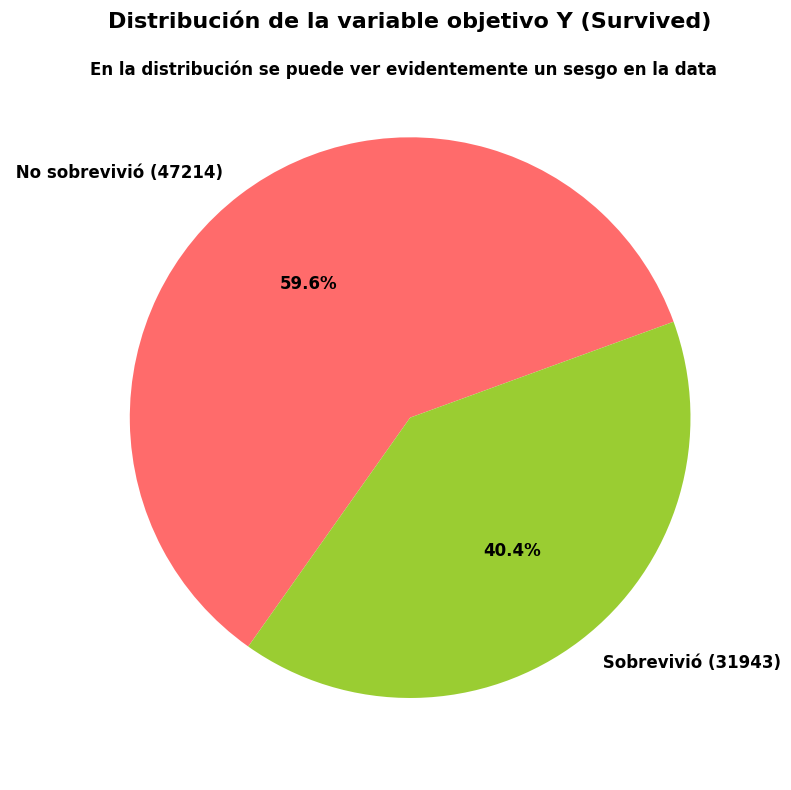

In [ ]:
# Calcular proporciones por clase
clases, counts = np.unique(y, return_counts=True)

# Crear etiquetas personalizadas
labels = [f" {'No sobrevivió' if clases[i]==0 else 'Sobrevivió'} ({counts[i]})"
          for i in range(len(clases))]

# Colores: rojo para muerte, verde para supervivencia
colors = ["#FF6B6B", "#9ACD32"]

# Crear gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=20,
        colors=colors, textprops={'fontsize': 12, 'weight': 'bold'})
plt.title("Distribución de la variable objetivo Y (Survived)",
          fontsize=16, fontweight="bold", pad=20)
plt.axis("equal")
plt.tight_layout()
subtitulo = "En la distribución se puede ver evidentemente un sesgo en la data"
plt.figtext(0.51, 0.9, subtitulo, ha='center', fontsize=12, weight='bold', color='black')
plt.show()

# 2.Pipeline

## RQ3

Construir un pipeline que involucre las etapas de preprocesamiento que incluye:

    Tratamiento de atípicos
    Tratamiento de nulos
    Escalado


In [ ]:
# Pipelines

#Columnas

num_cols = [
    'RoundKills',
    'RoundHeadshots',
    'RoundFlankKills',
    'RoundStartingEquipmentValue',
    'TeamStartingEquipmentValue',
    'MatchKills',
    'MatchFlankKills',
    'MatchAssists',
    'MatchHeadshots',
    'AvgMatchKillDist']

cat_cols = ['Map',
    'Team']

#Pipeline numerico
num_pipeline = Pipeline([
    ("winsor", Winsorizer()),
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

#Pipeline categorico
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"\nDistribución de conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))
print(f"\nDistribución de conjunto de prueba:")
print(y_test.value_counts(normalize=True))

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ],
    remainder='drop'
)

print(f"Columnas numéricas: {num_cols}")
print(f"Columnas categóricas: {cat_cols}")

Tamaño del conjunto de entrenamiento: (63325, 12)
Tamaño del conjunto de prueba: (15832, 12)

Distribución de conjunto de entrenamiento:
Survived
False    0.596463
True     0.403537
Name: proportion, dtype: float64

Distribución de conjunto de prueba:
Survived
False    0.59645
True     0.40355
Name: proportion, dtype: float64
Columnas numéricas: ['RoundKills', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots', 'AvgMatchKillDist']
Columnas categóricas: ['Map', 'Team']


Se puede observar que despues del procesamiento los datos obtenidos son bastante similares al grafico debido a que la data original estaba "limpia" y el procesamiento dejo entrever que el resultado puede llegar a ser similar tanto en el train como en le test

## RQ4


Construir CUATRO pipelines, uno para cada modelo, que permita crear el modelo a partir de su algoritmo asociado. Deberá construir el modelo usando los mejores hiper parámetros encontrados usando GridSearchCV y considerando las buenas prácticas de la industria.

### Modelo 1: Regresion logistica

In [ ]:
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(
    pipeline_lr,
    param_grid_lr,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_lr.fit(X_train, y_train)

print(f"Mejor puntaje (F1): {grid_lr.best_score_:.4f}")
print(f"Mejores hiperparámetros: {grid_lr.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor puntaje (F1): 0.5281
Mejores hiperparámetros: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


### Modelo 2: SVC

In [ ]:
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42, probability=True))
])

param_grid_svc = {
    'classifier__C': [1, 10],
    'classifier__kernel': ['linear'],
    'classifier__gamma': ['auto']
}

X_train_svc, y_train_svc = resample(
    X_train, y_train,
    n_samples=int(0.3 * len(X_train)),
    random_state=42,
    stratify=y_train
)

grid_svc = GridSearchCV(
    pipeline_svc,
    param_grid_svc,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_svc.fit(X_train_svc, y_train_svc)

print(f"Mejor puntaje (F1): {grid_svc.best_score_:.4f}")
print(f"Mejores hiperparámetros: {grid_svc.best_params_}")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Mejor puntaje (F1): 0.5255
Mejores hiperparámetros: {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'linear'}


### Modelo 3: Decision Tree Classifier

In [ ]:
pipeline_dt = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    pipeline_dt,
    param_grid_dt,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train, y_train)

print(f"Mejor puntaje (F1): {grid_dt.best_score_:.4f}")
print(f"Mejores hiperparámetros: {grid_dt.best_params_}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejor puntaje (F1): 0.5290
Mejores hiperparámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}


### Modelo 4: Random Forest Classifier

In [ ]:
pipeline_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [10, 20],
    'classifier__min_samples_leaf': [5, 10],
    'classifier__max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    pipeline_rf,
    param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

print(f"Mejor puntaje (F1): {grid_rf.best_score_:.4f}")
print(f"Mejores hiperparámetros: {grid_rf.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejor puntaje (F1): 0.5427
Mejores hiperparámetros: {'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}


# 3.Métricas por modelo

##RQ5

Calcular para todos los modelos construidos las siguientes métricas:

    Accuracy
    Precision
    F1-score
    Recall
    Matriz de confusión


### Modelo 1: Regresion logistica

Después de entrenar el modelo de Regresión Logística y evaluarlo con los datos de prueba, se generó el siguiente reporte de clasificación, que resume el desempeño del modelo prediciendo si un jugador sobrevive o no sobrevive.

In [ ]:
y_pred_lr = grid_lr.predict(X_test)
y_proba_lr = grid_lr.predict_proba(X_test)[:, 1]
train_pred_lr = grid_lr.predict(X_train)
train_proba_lr = grid_lr.predict_proba(X_train)[:, 1]

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_lr, target_names=['No sobrevive', 'Sobrevive']))

Reporte de Clasificación:
              precision    recall  f1-score   support

No sobrevive       0.69      0.82      0.75      9443
   Sobrevive       0.63      0.45      0.53      6389

    accuracy                           0.67     15832
   macro avg       0.66      0.64      0.64     15832
weighted avg       0.66      0.67      0.66     15832




No sobrevive
| Métrica              || Interpretación |
| -------------------- | --------------------------------------------------------------------------------------- | -------------- |
| **Precision = 0.69** | De todas las veces que el modelo predijo “No sobrevive”, acertó el 69%.                 |                |
| **Recall = 0.82**    | El modelo detectó correctamente el 82% de los jugadores que realmente NO sobrevivieron. |                |
| **F1-score = 0.75**  | Buen equilibrio entre precision y recall para esta clase.                               |                |

Sobrevive

| Métrica              || Interpretación |
| -------------------- | ------------------------------------------------------------------------------- | -------------- |
| **Precision = 0.63** | De las predicciones "Sobrevive", solo el 63% fueron correctas.                  |                |
| **Recall = 0.45**    | El modelo solo logra detectar al 45% de los jugadores que realmente sobreviven. |                |
| **F1-score = 0.53**  | Desempeño más débil en esta clase.                                              |                |



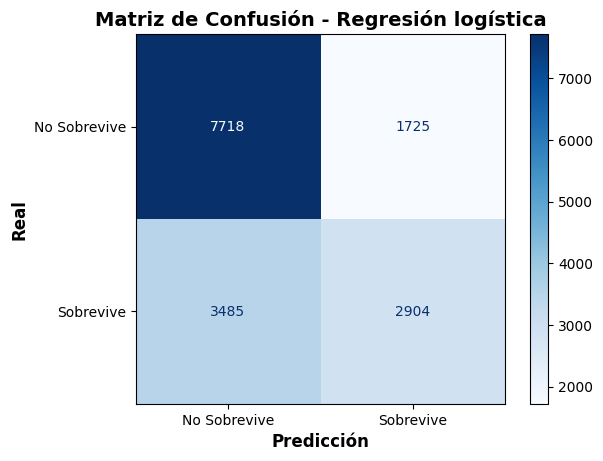

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr,
                                        display_labels=["No Sobrevive", "Sobrevive"],
                                        cmap="Blues")
plt.title("Matriz de Confusión - Regresión logística", fontsize=14, fontweight="bold")
plt.xlabel("Predicción", fontsize=12, fontweight="bold")
plt.ylabel("Real", fontsize=12, fontweight="bold")
plt.show()

**Matriz de confusión:**

```
[[7718 1725]
 [3485 2904]]
```

**Interpretación:**

* **Verdaderos Negativos (cm[0,0]): 7718** → Jugadores que **NO sobrevivieron** y fueron clasificados correctamente por el modelo.
* **Falsos Positivos (cm[0,1]): 1725** → Jugadores que **NO sobrevivieron**, pero el modelo predijo que **sí sobrevivían**.
* **Falsos Negativos (cm[1,0]): 3485** → Jugadores que **sí sobrevivieron**, pero el modelo predijo que **no sobrevivían**.
* **Verdaderos Positivos (cm[1,1]): 2904** → Jugadores que **sí sobrevivieron** y fueron correctamente identificados por el modelo.


Conclusión:


El modelo de Regresión Logística muestra un buen desempeño al identificar la clase “No sobrevive”, obteniendo un recall de 0.82. Sin embargo, presenta dificultades significativas para reconocer correctamente a los jugadores que sí sobreviven, alcanzando un recall de solo 0.45. Esto refleja una tendencia del modelo a favorecer la clase mayoritaria, lo que limita su capacidad para detectar casos positivos. A pesar de su rendimiento moderado, la Regresión Logística sigue siendo un modelo estable y eficiente, y sirve como una buena línea base para comparar otros algoritmos más complejos.

### Modelo 2: SVC

Después de entrenar el modelo SVC y evaluarlo con los datos de prueba se generó el siguiente reporte de clasificación, que resume el desempeño del modelo al predecir si un jugador sobrevive o no sobrevive.

In [ ]:
y_pred_svc = grid_svc.predict(X_test)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_svc, target_names=['No sobrevive', 'Sobrevive']))

Reporte de Clasificación:
              precision    recall  f1-score   support

No sobrevive       0.69      0.79      0.73      9443
   Sobrevive       0.60      0.47      0.53      6389

    accuracy                           0.66     15832
   macro avg       0.64      0.63      0.63     15832
weighted avg       0.65      0.66      0.65     15832



No sobrevive
| Métrica              || Interpretación |
| -------------------- | ----------------------------------------------------------------------------------- | -------------- |
| **Precision = 0.69** | El 69% de las predicciones de esta clase fueron correctas.                          |                |
| **Recall = 0.79**    | El modelo logró identificar al 79% de los jugadores que realmente NO sobrevivieron. |                |
| **F1-score = 0.73**  | Buen desempeño general para esta clase.                                             |                |



Sobrevive

| Métrica              |                                                        | Interpretación |
| -------------------- | ------------------------------------------------------------------------------- | -------------- |
| **Precision = 0.60** | Cuando el modelo predice “Sobrevive”, acierta el 60% de las veces.              |                |
| **Recall = 0.47**    | Identifica correctamente solo el 47% de los jugadores que realmente sobreviven. |                |
| **F1-score = 0.53**  | Rendimiento moderado-bajo para esta clase.                                      |                |


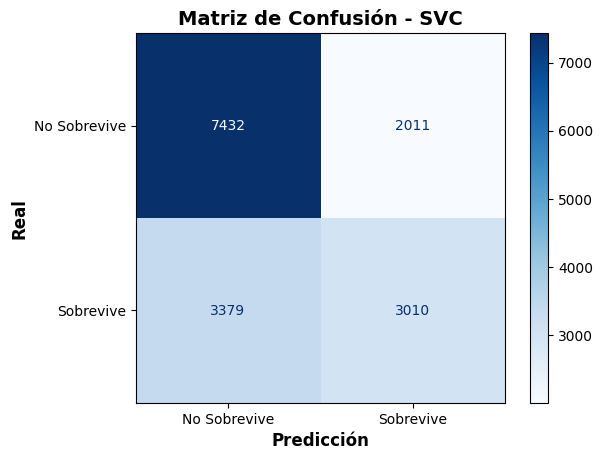

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc,
                                        display_labels=["No Sobrevive", "Sobrevive"],
                                        cmap="Blues")
plt.title("Matriz de Confusión - SVC", fontsize=14, fontweight="bold")
plt.xlabel("Predicción", fontsize=12, fontweight="bold")
plt.ylabel("Real", fontsize=12, fontweight="bold")
plt.show()

**Matriz de confusión:**

```
[[7432 2011]
 [3379 3010]]
```

**Interpretación:**

* **Verdaderos Negativos (cm[0,0]): 7432** → Jugadores que **NO sobrevivieron** y fueron clasificados correctamente por el modelo.
* **Falsos Positivos (cm[0,1]): 2011** → Jugadores que **NO sobrevivieron**, pero el modelo predijo que **sí sobrevivían**.
* **Falsos Negativos (cm[1,0]): 3379** → Jugadores que **sí sobrevivieron**, pero el modelo predijo que **no sobrevivían**.
* **Verdaderos Positivos (cm[1,1]): 3010** → Jugadores que **sí sobrevivieron** y fueron correctamente identificados por el modelo.


Conclusión:


El modelo SVC destaca por su capacidad para identificar la clase “No sobrevive”, logrando un recall de 0.79. No obstante, su desempeño disminuye al evaluar la clase “Sobrevive”, donde alcanza un recall de 0.47, evidenciando nuevamente el impacto del desbalance en los datos. Aunque su rendimiento es similar al de la Regresión Logística, el SVC no muestra mejoras sustanciales en la detección de la clase minoritaria. Aun así, ofrece estabilidad y puede ser útil como modelo de referencia dentro del análisis comparativo.

### Modelo 3: Decision Tree Classifier

Después de entrenar el modelo Decision Tree y evaluarlo con los datos de prueba, se generó el siguiente reporte de clasificación, que resume el desempeño del modelo al predecir si un jugador sobrevive o no sobrevive.

In [ ]:
y_pred_dt = grid_dt.predict(X_test)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_dt, target_names=['No sobrevive', 'Sobrevive']))

Reporte de Clasificación:
              precision    recall  f1-score   support

No sobrevive       0.69      0.77      0.73      9443
   Sobrevive       0.59      0.49      0.54      6389

    accuracy                           0.66     15832
   macro avg       0.64      0.63      0.63     15832
weighted avg       0.65      0.66      0.65     15832



No sobrevive

| Métrica              |                                                          | Interpretación |
| -------------------- | ------------------------------------------------------------------------------------------ | -------------- |
| **Precision = 0.69** | El 69% de las predicciones “No sobrevive” fueron correctas.                                |                |
| **Recall = 0.77**    | El modelo identificó correctamente el 77% de los jugadores que realmente NO sobrevivieron. |                |
| **F1-score = 0.73**  | Buen equilibrio general para esta clase.                                                   |                |


Sobrevive

| Métrica              |                                                                         | Interpretación |
| -------------------- | ------------------------------------------------------------------------------- | -------------- |
| **Precision = 0.59** | El 59% de las predicciones “Sobrevive” fueron correctas.                        |                |
| **Recall = 0.49**    | El modelo solo identifica correctamente al 49% de quienes realmente sobreviven. |                |
| **F1-score = 0.54**  | Rendimiento moderado, pero levemente mejor que en modelos anteriores.           |                |



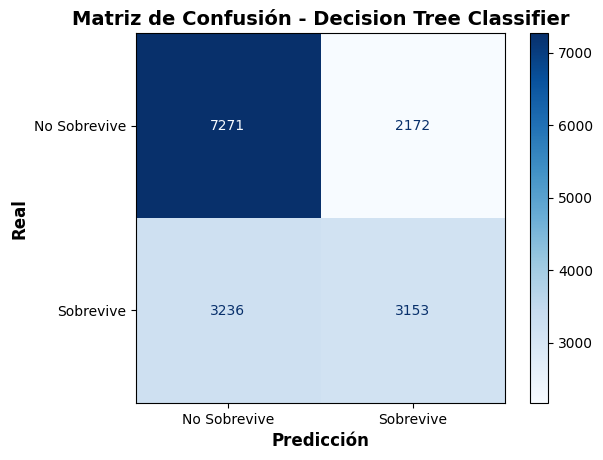

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt,
                                        display_labels=["No Sobrevive", "Sobrevive"],
                                        cmap="Blues")
plt.title("Matriz de Confusión - Decision Tree Classifier", fontsize=14, fontweight="bold")
plt.xlabel("Predicción", fontsize=12, fontweight="bold")
plt.ylabel("Real", fontsize=12, fontweight="bold")
plt.show()

**Matriz de confusión:**

```
[[7271 2172]
 [3236 3153]]
```

**Interpretación:**

* **Verdaderos Negativos (cm[0,0]): 7271** → Jugadores que **NO sobrevivieron** y fueron clasificados correctamente por el modelo.
* **Falsos Positivos (cm[0,1]): 2172** → Jugadores que **NO sobrevivieron**, pero el modelo predijo que **sí sobrevivían**.
* **Falsos Negativos (cm[1,0]): 3236** → Jugadores que **sí sobrevivieron**, pero el modelo predijo que **no sobrevivían**.
* **Verdaderos Positivos (cm[1,1]): 3153** → Jugadores que **sí sobrevivieron** y fueron correctamente identificados por el modelo.


Conclusión:

El modelo Decision Tree presenta un rendimiento consistente al identificar la clase “No sobrevive”, alcanzando un recall de 0.77. Sin embargo, su capacidad para detectar la clase “Sobrevive” sigue siendo limitada, con un recall de 0.49. Aunque no supera significativamente los resultados obtenidos por modelos como la Regresión Logística o el SVC, el árbol de decisión destaca por su interpretabilidad, lo que permite comprender de forma clara las reglas detrás de las predicciones. Esto lo convierte en una base valiosa para modelos más robustos, como Random Forest.

### Modelo 4: Random Forest Classifier

Después de entrenar el modelo Random Forest y evaluarlo con los datos de prueba, se generó el siguiente reporte de clasificación, que resume el desempeño del modelo al predecir si un jugador sobrevive o no sobrevive.

In [ ]:
y_pred_rf = grid_rf.predict(X_test)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=['No sobrevive', 'Sobrevive']))


Reporte de Clasificación:
              precision    recall  f1-score   support

No sobrevive       0.70      0.78      0.74      9443
   Sobrevive       0.61      0.51      0.56      6389

    accuracy                           0.67     15832
   macro avg       0.66      0.65      0.65     15832
weighted avg       0.67      0.67      0.67     15832



No sobrevive

| Métrica              |                                                                     | Interpretación |
| -------------------- | ------------------------------------------------------------------------- | -------------- |
| **Precision = 0.70** | El 70% de las predicciones “No sobrevive” fueron correctas.               |                |
| **Recall = 0.78**    | El modelo logró identificar al 78% de quienes realmente no sobrevivieron. |                |
| **F1-score = 0.74**  | Buen rendimiento general para esta clase.                                 |                |


Sobrevive

| Métrica              |                                                          | Interpretación |
| -------------------- | -------------------------------------------------------------------------- | -------------- |
| **Precision = 0.61** | Cuando predice “Sobrevive”, acierta el 61% de las veces.                   |                |
| **Recall = 0.51**    | Identifica correctamente al 51% de los jugadores que realmente sobreviven. |                |
| **F1-score = 0.56**  | Desempeño moderado, pero el mejor entre los cuatro modelos evaluados.      |                |


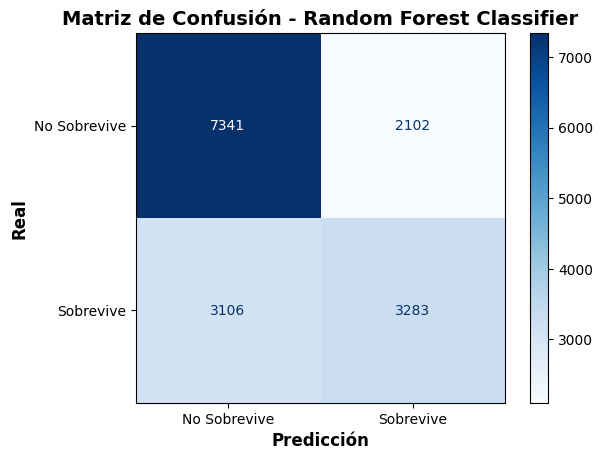

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf,
                                        display_labels=["No Sobrevive", "Sobrevive"],
                                        cmap="Blues")
plt.title("Matriz de Confusión - Random Forest Classifier", fontsize=14, fontweight="bold")
plt.xlabel("Predicción", fontsize=12, fontweight="bold")
plt.ylabel("Real", fontsize=12, fontweight="bold")
plt.show()

**Matriz de confusión:**

```
[[7341 2102]
 [3106 3283]]
```

**Interpretación:**

* **Verdaderos Negativos (cm[0,0]): 7341** → Jugadores que **NO sobrevivieron** y fueron clasificados correctamente por el modelo.
* **Falsos Positivos (cm[0,1]): 2102** → Jugadores que **NO sobrevivieron**, pero el modelo predijo que **sí sobrevivían**.
* **Falsos Negativos (cm[1,0]): 3106** → Jugadores que **sí sobrevivieron**, pero el modelo predijo que **no sobrevivían**.
* **Verdaderos Positivos (cm[1,1]): 3283** → Jugadores que **sí sobrevivieron** y fueron correctamente identificados por el modelo.


Conclusión:

El modelo Random Forest muestra un rendimiento sólido al identificar la clase “No sobrevive”, alcanzando un recall de 0.78. Además, mejora la detección de la clase “Sobrevive” en comparación con los demás modelos evaluados, logrando un recall de 0.51, el más alto entre las cuatro alternativas. Aunque aún existe una diferencia notable entre ambas clases debido al desbalance de los datos, Random Forest ofrece la mejor capacidad de generalización y un desempeño más equilibrado entre precision, recall y f1-score. Esto lo convierte en la opción más robusta y estable frente a la Regresión Logística, el SVC y el Árbol de Decisión, destacando especialmente en la identificación de la clase minoritaria.

# 4.Analisis

## RQ6

Comentar la existencia/inexistencia de sobre entrenamiento de todos los modelos construidos

Con el fin de evaluar el desempeño y la capacidad de generalización de los modelos desarrollados, se analizarán las métricas de entrenamiento y prueba para los cuatro algoritmos seleccionados. A partir de estos resultados, se aplicarán los criterios establecidos para identificar posibles comportamientos de sobreentrenamiento u otros patrones.

| Situación                          | Interpretación |
|-----------------------------------|----------------|
| Train muy alto, Test mucho más bajo | Overfitting     |
| Train y Test similares y buenos     | Modelo correcto |
| Train y Test similares pero bajos    | Underfitting    |


Este análisis permitirá determinar la calidad del aprendizaje en cada modelo y su capacidad para generalizar a datos nuevos.

### Modelo 1: Regresion logistica

In [ ]:
train_pred_lr = grid_lr.predict(X_train)
train_proba_lr = grid_lr.predict_proba(X_train)[:, 1]

train_acc_lr = accuracy_score(y_train, train_pred_lr)
train_auc_lr = roc_auc_score(y_train, train_proba_lr)
train_precision_lr = precision_score(y_train, train_pred_lr)
train_f1_lr = f1_score(y_train, train_pred_lr)

print("=== Métricas en Entrenamiento ===")
print(f"{'Accuracy en entrenamiento' :<35} : {train_acc_lr :.2f}")
print(f"{'AUC en entrenamiento' : <35} : {train_auc_lr :.2f}")
print(f"{'Precisión en entrenamiento' : <35} : {train_precision_lr :.2f}")
print(f"{'F1 score en entrenamiento' : <35} : {train_f1_lr :.2f}")

=== Métricas en Entrenamiento ===
Accuracy en entrenamiento           : 0.67
AUC en entrenamiento                : 0.71
Precisión en entrenamiento          : 0.63
F1 score en entrenamiento           : 0.53


In [ ]:
y_pred_lr = grid_lr.predict(X_test)
y_proba_lr = grid_lr.predict_proba(X_test)[:, 1]

test_acc_lr = accuracy_score(y_test, y_pred_lr)
test_auc_lr = roc_auc_score(y_test, y_proba_lr)
test_precision_lr = precision_score(y_test, y_pred_lr)
test_f1_lr = f1_score(y_test, y_pred_lr)

print("\n=== Métricas en Test ===")
print(f"{'Accuracy en test' :<35} : {test_acc_lr :.2f}")
print(f"{'AUC en test' : <35} : {test_auc_lr :.2f}")
print(f"{'Precisión en test' : <35} : {test_precision_lr :.2f}")
print(f"{'F1 score en test' : <35} : {test_f1_lr :.2f}")


=== Métricas en Test ===
Accuracy en test                    : 0.67
AUC en test                         : 0.71
Precisión en test                   : 0.63
F1 score en test                    : 0.53


In [ ]:
resumen_lr = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "Accuracy": [train_acc_lr, test_acc_lr],
    "AUC": [train_auc_lr, test_auc_lr],
    "Precision": [train_precision_lr, test_precision_lr],
    "F1 score": [train_f1_lr, test_f1_lr]
}).round(4)

display(resumen_lr)

,Dataset,Accuracy,AUC,Precision,F1 score
0,Train,0.6737,0.7120,0.6341,0.5283
1,Test,0.6709,0.7073,0.6273,0.5271


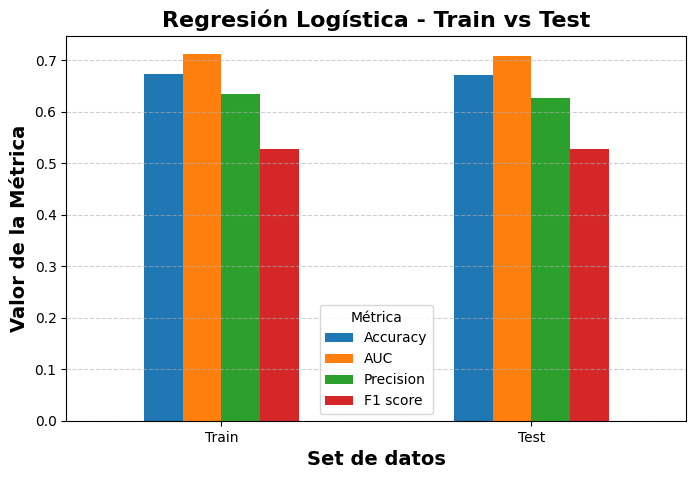

In [ ]:
plt.figure(figsize=(8,5))

ax = resumen_lr.set_index("Dataset").plot(kind="bar", ax=plt.gca())
plt.title("Regresión Logística - Train vs Test", fontsize=16, fontweight="bold")
plt.ylabel("Valor de la Métrica", fontsize=14, fontweight="bold")
plt.xlabel("Set de datos", fontsize=14, fontweight="bold")
plt.xticks(rotation=0)
plt.legend(title="Métrica")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()


Las métricas del conjunto de entrenamiento y del conjunto de prueba son prácticamente idénticas en todos los indicadores. No se observa una caída significativa del rendimiento al pasar de train a test.

De acuerdo con la tabla de criterios:

Train y Test similares y buenos → Modelo correcto

En este caso, los valores son coherentes y estables, por lo que el modelo no presenta señales de sobreentrenamiento ni subentrenamiento. Su capacidad predictiva es moderada, pero consistente.

### Modelo 2: SVC


In [ ]:
train_pred_svc = grid_svc.predict(X_train)
train_proba_svc = grid_svc.predict_proba(X_train)[:, 1]

train_acc_svc = accuracy_score(y_train, train_pred_svc)
train_auc_svc = roc_auc_score(y_train, train_proba_svc)
train_precision_svc = precision_score(y_train, train_pred_svc)
train_f1_svc = f1_score(y_train, train_pred_svc)

print("=== Métricas en Entrenamiento ===")
print(f"{'Accuracy en entrenamiento' :<35} : {train_acc_svc :.2f}")
print(f"{'AUC en entrenamiento' : <35} : {train_auc_svc :.2f}")
print(f"{'Precisión en entrenamiento' : <35} : {train_precision_svc :.2f}")
print(f"{'F1 score en entrenamiento' : <35} : {train_f1_svc :.2f}")

=== Métricas en Entrenamiento ===
Accuracy en entrenamiento           : 0.66
AUC en entrenamiento                : 0.69
Precisión en entrenamiento          : 0.61
F1 score en entrenamiento           : 0.53


In [ ]:
y_pred_svc = grid_svc.predict(X_test)
y_proba_svc = grid_svc.predict_proba(X_test)[:, 1]

test_acc_svc = accuracy_score(y_test, y_pred_svc)
test_auc_svc = roc_auc_score(y_test, y_proba_svc)
test_precision_svc = precision_score(y_test, y_pred_svc)
test_f1_svc = f1_score(y_test, y_pred_svc)

print("\n=== Métricas en Test ===")
print(f"{'Accuracy en test' :<35} : {test_acc_svc :.2f}")
print(f"{'AUC en test' : <35} : {test_auc_svc :.2f}")
print(f"{'Precisión en test' : <35} : {test_precision_svc :.2f}")
print(f"{'F1 score en test' : <35} : {test_f1_svc :.2f}")




=== Métricas en Test ===
Accuracy en test                    : 0.66
AUC en test                         : 0.69
Precisión en test                   : 0.60
F1 score en test                    : 0.53


In [ ]:
resumen_svc = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "Accuracy": [train_acc_svc, test_acc_svc],
    "AUC": [train_auc_svc, test_auc_svc],
    "Precision": [train_precision_svc, test_precision_svc],
    "F1 score": [train_f1_svc, test_f1_svc]
}).round(4)

display(resumen_svc)

,Dataset,Accuracy,AUC,Precision,F1 score
0,Train,0.6635,0.6907,0.6057,0.5332
1,Test,0.6596,0.6851,0.5995,0.5276


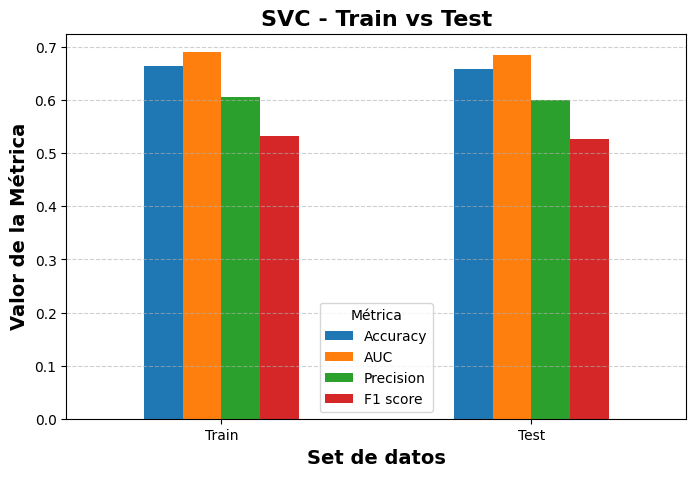

In [ ]:
plt.figure(figsize=(8,5))

ax = resumen_svc.set_index("Dataset").plot(kind="bar", ax=plt.gca())
plt.title("SVC - Train vs Test", fontsize=16, fontweight="bold")
plt.ylabel("Valor de la Métrica", fontsize=14, fontweight="bold")
plt.xlabel("Set de datos", fontsize=14, fontweight="bold")
plt.xticks(rotation=0)
plt.legend(title="Métrica")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

Las métricas del modelo SVC muestran valores muy similares entre el conjunto de entrenamiento y el de prueba.
Las diferencias son mínimas (del orden de 0.003 a 0.005), lo cual indica que el modelo mantiene un rendimiento estable entre ambos conjuntos.

Esto corresponde a la situación:

Train y Test similares y buenos → Modelo correcto

No existe indicio de overfitting, ya que el modelo no obtiene resultados significativamente mejores en entrenamiento.
Tampoco hay señales de underfitting, aunque el rendimiento es moderado; es consistente y suficiente para indicar que el modelo logra capturar patrones relevantes sin sobreajustarse.

### Modelo 3: Decision Tree Classifier

In [ ]:
train_pred_dt = grid_dt.predict(X_train)
train_proba_dt = grid_dt.predict_proba(X_train)[:, 1]

train_acc_dt = accuracy_score(y_train, train_pred_dt)
train_auc_dt = roc_auc_score(y_train, train_proba_dt)
train_precision_dt = precision_score(y_train, train_pred_dt)
train_f1_dt = f1_score(y_train, train_pred_dt)

print("=== Métricas en Entrenamiento ===")
print(f"{'Accuracy en entrenamiento' :<35} : {train_acc_dt :.2f}")
print(f"{'AUC en entrenamiento' : <35} : {train_auc_dt :.2f}")
print(f"{'Precisión en entrenamiento' : <35} : {train_precision_dt :.2f}")
print(f"{'F1 score en entrenamiento' : <35} : {train_f1_dt :.2f}")

=== Métricas en Entrenamiento ===
Accuracy en entrenamiento           : 0.70
AUC en entrenamiento                : 0.75
Precisión en entrenamiento          : 0.65
F1 score en entrenamiento           : 0.59


In [ ]:
y_pred_dt = grid_dt.predict(X_test)
y_proba_dt = grid_dt.predict_proba(X_test)[:, 1]

test_acc_dt = accuracy_score(y_test, y_pred_dt)
test_auc_dt = roc_auc_score(y_test, y_proba_dt)
test_precision_dt = precision_score(y_test, y_pred_dt)
test_f1_dt = f1_score(y_test, y_pred_dt)

print("\n=== Métricas en Test ===")
print(f"{'Accuracy en test' :<35} : {test_acc_dt :.2f}")
print(f"{'AUC en test' : <35} : {test_auc_dt :.2f}")
print(f"{'Precisión en test' : <35} : {test_precision_dt :.2f}")
print(f"{'F1 score en test' : <35} : {test_f1_dt :.2f}")


=== Métricas en Test ===
Accuracy en test                    : 0.66
AUC en test                         : 0.70
Precisión en test                   : 0.59
F1 score en test                    : 0.54


In [ ]:
resumen_dt = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "Accuracy": [train_acc_dt, test_acc_dt],
    "AUC": [train_auc_dt, test_auc_dt],
    "Precision": [train_precision_dt, test_precision_dt],
    "F1 score": [train_f1_dt, test_f1_dt]
}).round(4)

display(resumen_dt)

,Dataset,Accuracy,AUC,Precision,F1 score
0,Train,0.6972,0.7544,0.6530,0.5869
1,Test,0.6584,0.6958,0.5921,0.5383


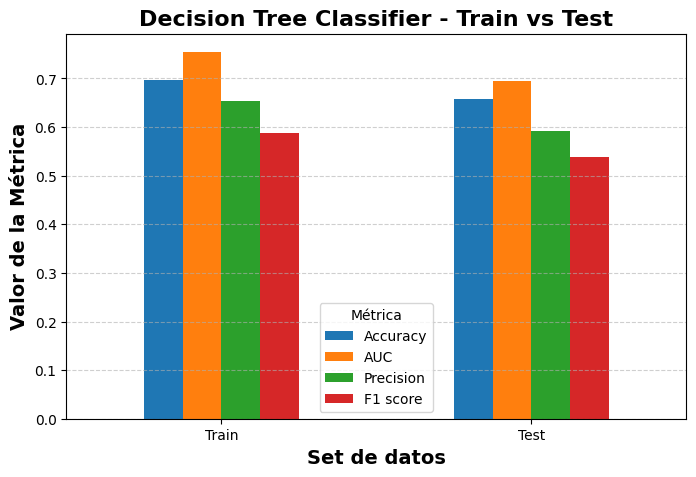

In [ ]:
plt.figure(figsize=(8,5))

ax = resumen_dt.set_index("Dataset").plot(kind="bar", ax=plt.gca())
plt.title("Decision Tree Classifier - Train vs Test", fontsize=16, fontweight="bold")
plt.ylabel("Valor de la Métrica", fontsize=14, fontweight="bold")
plt.xlabel("Set de datos", fontsize=14, fontweight="bold")
plt.xticks(rotation=0)
plt.legend(title="Métrica")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

En este modelo se observa que las métricas del conjunto de entrenamiento son notablemente más altas que las del conjunto test.
Las diferencias son cercanas a:

Accuracy: +0.04

AUC: +0.06

Precision: +0.06

F1: +0.05

Estas brechas indican que el modelo aprende muy bien los patrones del conjunto de entrenamiento, pero su rendimiento disminuye al enfrentarse a datos nuevos.

Esto coincide con la situación:

Train muy alto, Test mucho más bajo → Overfitting

El modelo Decision Tree Classifier presenta sobreentrenamiento.
Generaliza menos que los modelos anteriores y su rendimiento cae en el conjunto de prueba. Aunque no es un caso extremo, sí muestra una diferencia clara entre train y test, por lo que su capacidad predictiva real podría ser menor de lo que aparenta en entrenamiento.

### Modelo 4: Random Forest Classifier

In [ ]:
train_pred_rf = grid_rf.predict(X_train)
train_proba_rf = grid_rf.predict_proba(X_train)[:, 1]

train_acc_rf = accuracy_score(y_train, train_pred_rf)
train_auc_rf = roc_auc_score(y_train, train_proba_rf)
train_precision_rf = precision_score(y_train, train_pred_rf)
train_f1_rf = f1_score(y_train, train_pred_rf)

print("=== Métricas en Entrenamiento ===")
print(f"{'Accuracy en entrenamiento' :<35} : {train_acc_rf :.2f}")
print(f"{'AUC en entrenamiento' : <35} : {train_auc_rf :.2f}")
print(f"{'Precisión en entrenamiento' : <35} : {train_precision_rf :.2f}")
print(f"{'F1 score en entrenamiento' : <35} : {train_f1_rf :.2f}")

=== Métricas en Entrenamiento ===
Accuracy en entrenamiento           : 0.67
AUC en entrenamiento                : 0.72
Precisión en entrenamiento          : 0.62
F1 score en entrenamiento           : 0.55


In [ ]:
y_pred_rf = grid_rf.predict(X_test)
y_proba_rf = grid_rf.predict_proba(X_test)[:, 1]

test_acc_rf = accuracy_score(y_test, y_pred_rf)
test_auc_rf = roc_auc_score(y_test, y_proba_rf)
test_precision_rf = precision_score(y_test, y_pred_rf)
test_f1_rf = f1_score(y_test, y_pred_rf)

print("\n=== Métricas en Test ===")
print(f"{'Accuracy en test' :<35} : {test_acc_rf :.2f}")
print(f"{'AUC en test' : <35} : {test_auc_rf :.2f}")
print(f"{'Precisión en test' : <35} : {test_precision_rf :.2f}")
print(f"{'F1 score en test' : <35} : {test_f1_rf :.2f}")


=== Métricas en Test ===
Accuracy en test                    : 0.67
AUC en test                         : 0.71
Precisión en test                   : 0.61
F1 score en test                    : 0.54


In [ ]:
resumen_rf = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "Accuracy": [train_acc_rf, test_acc_rf],
    "AUC": [train_auc_rf, test_auc_rf],
    "Precision": [train_precision_rf, test_precision_rf],
    "F1 score": [train_f1_rf, test_f1_rf]
}).round(4)

display(resumen_rf)

,Dataset,Accuracy,AUC,Precision,F1 score
0,Train,0.6731,0.7174,0.6213,0.5456
1,Test,0.6680,0.7092,0.6116,0.5413


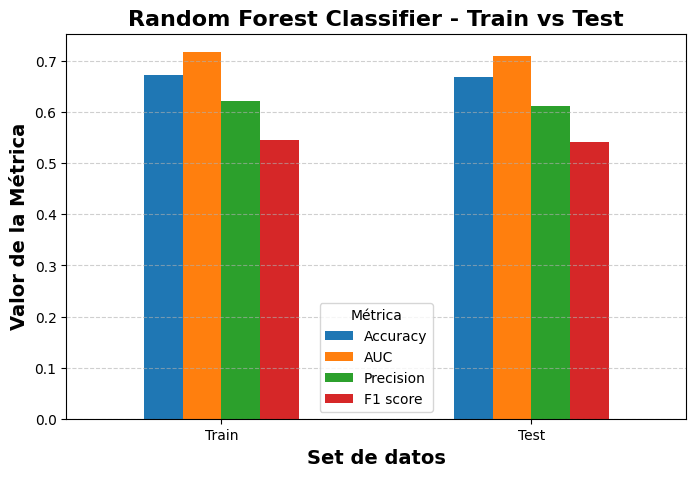

In [ ]:
plt.figure(figsize=(8,5))

ax = resumen_rf.set_index("Dataset").plot(kind="bar", ax=plt.gca())
plt.title("Random Forest Classifier - Train vs Test", fontsize=16, fontweight="bold")
plt.ylabel("Valor de la Métrica", fontsize=14, fontweight="bold")
plt.xlabel("Set de datos", fontsize=14, fontweight="bold")
plt.xticks(rotation=0)
plt.legend(title="Métrica")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

Las métricas en entrenamiento y prueba son prácticamente idénticas:

Accuracy: 0.67 (train) vs 0.67 (test)

AUC: 0.72 (train) vs 0.71 (test)

Precisión: 0.62 (train) vs 0.61 (test)

F1: 0.55 (train) vs 0.54 (test)

Esto corresponde a la situación:

Train y Test similares y buenos → Modelo correcto

Las diferencias entre entrenamiento y test son insignificantes, lo que indica que el modelo:

Aprende de manera consistente

Generaliza bien a datos nuevos

No memoriza ni se queda corto en capacidad

# 5.Selección del mejor modelo

## RQ7

Considerando todos los modelos anteriores:

    Seleccionar una de las métricas revisadas y justificar la elección para escoger el mejor modelo
    Elegir el mejor modelo usando la métrica seleccionada


In [ ]:
# Recopilar F1 Scores de todos los modelos
resultados_comparacion = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest'],
    'F1_Train': [train_f1_lr, train_f1_svc, train_f1_dt, train_f1_rf],
    'F1_Test': [test_f1_lr, test_f1_svc, test_f1_dt, test_f1_rf],
    'Acurracy_Test': [test_acc_lr, test_acc_svc, test_acc_dt, test_acc_rf],
    'Presicion_Test': [test_precision_lr, test_precision_svc, test_precision_dt, test_precision_rf],
})

resultados_comparacion['Diferencia_F1'] = abs(
    resultados_comparacion['F1_Train'] - resultados_comparacion['F1_Test']
)

print(resultados_comparacion.round(4))

                Modelo  F1_Train  F1_Test  Acurracy_Test  Presicion_Test  \
0  Logistic Regression    0.5283   0.5271         0.6709          0.6273   
1                  SVC    0.5332   0.5276         0.6596          0.5995   
2        Decision Tree    0.5869   0.5383         0.6584          0.5921   
3        Random Forest    0.5456   0.5413         0.6680          0.6116   

   Diferencia_F1  
0         0.0011  
1         0.0056  
2         0.0485  
3         0.0042  


In [ ]:
mejor_idx = resultados_comparacion['F1_Test'].idxmax()
mejor_modelo_info = resultados_comparacion.loc[mejor_idx]


print(f'Mejor modelo: {mejor_modelo_info["Modelo"]}')
print(f"F1 Score: {mejor_modelo_info['F1_Test']:.4f}")
print(f"Acurracy Score: {mejor_modelo_info['Acurracy_Test']:.4f}")
print(f"Presicion Score: {mejor_modelo_info['Presicion_Test']:.4f}")
print(f"Diferencia F1: {mejor_modelo_info['Diferencia_F1']:.4f}")

nombre_mejor = mejor_modelo_info["Modelo"]
if nombre_mejor == "Logistic Regression":
    mejor_modelo = grid_lr
    y_pred_mejor = y_pred_lr
    y_proba_mejor = y_proba_lr
elif nombre_mejor == "SVC":
    mejor_modelo = grid_svc
    y_pred_mejor = y_pred_svc
    y_proba_mejor = y_proba_svc
elif nombre_mejor == "Decision Tree":
    mejor_modelo = grid_dt
    y_pred_mejor = y_pred_dt
    y_proba_mejor = y_proba_dt
else:
    mejor_modelo = grid_rf
    y_pred_mejor = y_pred_rf
    y_proba_mejor = y_proba_rf

Mejor modelo: Random Forest
F1 Score: 0.5413
Acurracy Score: 0.6680
Presicion Score: 0.6116
Diferencia F1: 0.0042


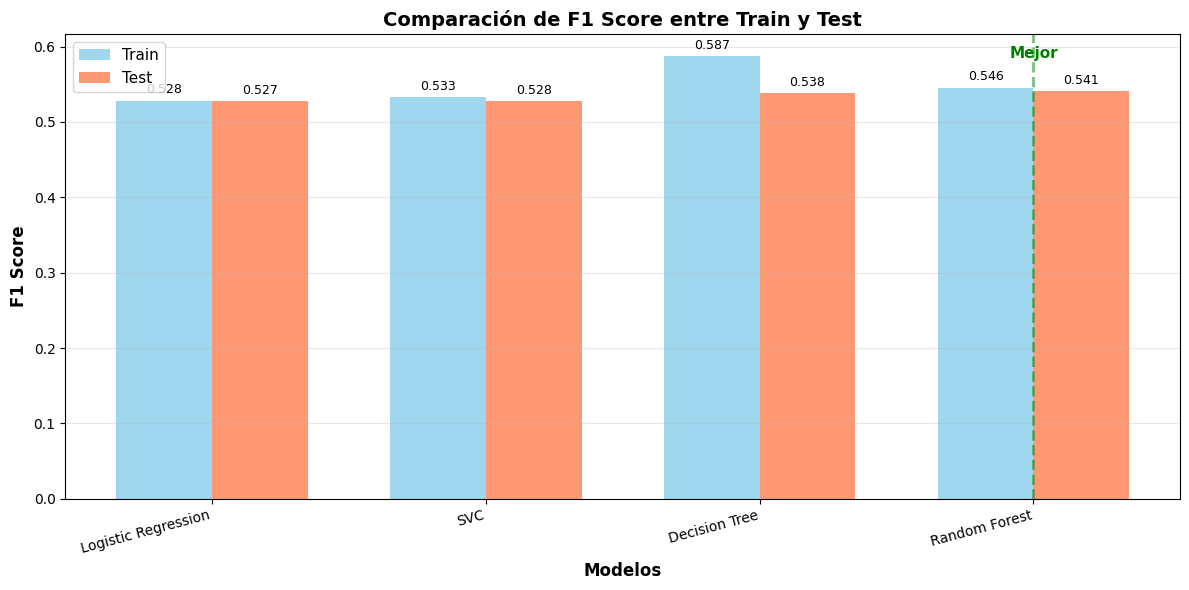

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(resultados_comparacion))
width= 0.35

bars1 = ax.bar(x - width/2, resultados_comparacion['F1_Train'], width, label="Train", color='skyblue', alpha=0.8)
bars2 = ax.bar(x + width/2, resultados_comparacion['F1_Test'], width, label="Test", color='coral', alpha=0.8)

ax.set_xlabel('Modelos', fontsize=12, fontweight='bold')
ax.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
ax.set_title('Comparación de F1 Score entre Train y Test', fontsize=14, fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(resultados_comparacion['Modelo'], rotation=15, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
  for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=9)
mejor_x = mejor_idx
ax.axvline(x=mejor_x, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax.text(mejor_x, ax.get_ylim()[1]*0.95, 'Mejor', ha='center', fontsize=11, fontweight='bold', color='green')

plt.tight_layout()
plt.show()

Se eligio random forest como mejor modelo ya que represento mejores datos en testing, por lo que significa que fue capaz de generalizar bien y no memorizar, lo que permite mejor funcionamiento con futuras partidas reales.

# 6.Interpretación de métricas en lenguaje de negocio

## RQ8

Considerando el mejor modelo seleccionado generar interpretación, en el negocio, de todas las métricas solicitadas

Modelo seleccionado: RANDOM FOREST

Accuracy: 0.6680
En términos de negocio, esto significa que el modelo acierta en aproximadamente el 66.8% de los casos al predecir si un jugador sobrevivirá o no a la ronda. Es una medida global del rendimiento del modelo y refleja un desempeño estable.

Precision: 0.6116
→ De todas las veces que el modelo predijo que un jugador SOBREVIVE, solo el 61.16% realmente sobrevivió. Desde la perspectiva del negocio, esta métrica indica cuán confiable es el sistema al afirmar que un jugador tiene probabilidad de sobrevivir.

Recall: 0.5139
→ El modelo identifica correctamente el 51.4% de los jugadores que REALMENTE sobreviven. En negocio, este indicador es clave si lo que se busca es detectar sobrevivientes.

F1-Score: 0.5413
→ El F1 combina precision y recall. Un F1 de 0.5413 refleja un equilibrio moderado entre evitar falsas alarmas y detectar correctamente a los jugadores que efectivamente sobreviven.

Matriz de confusión:
[[7341 2102]
 [3106 3283]]

Interpretación:
- Verdaderos Negativos (cm[0,0]): 7341 → Jugadores que NO sobrevivieron y fueron clasificados correctamente.
- Falsos Positivos (cm[0,1]): 2102 → Jugadores que NO sobrevivieron, pero el modelo dijo que sí.
- Falsos Negativos (cm[1,0]): 3106 → Jugadores que sí sobrevivieron, pero el modelo dijo que no.
- Verdaderos Positivos (cm[1,1]): 3283 → Jugadores que sobrevivieron y el modelo los detectó correctamente.

Conclusión de negocio:
El modelo Random Forest es el más adecuado porque entrega el mejor balance entre reconocer jugadores sobrevivientes (recall) y evitar predecir supervivencia incorrectamente (precision). Si este modelo se usara en un sistema real del juego, apoyaría la toma de decisiones basada en el desempeño de los jugadores, ya que identifica patrones sobre quién tiene mayor probabilidad de sobrevivir según sus estadísticas y desempeño durante la partida.

# 7.Predicciones con datos aleatorios

## RQ9

Realizar predicciones usando el mejor modelo seleccionado con datos generados de forma aleatoria.

In [ ]:
# Analisis de variables para dar variables realistas
for col in num_cols:
  print(f"\n {col}:")
  print(f"  Min: {X[col].min():.2f} | Max: {X[col].max():.2f} | Media: {X[col].mean():.2f} | Mediana: {X[col].median():.2f}")


 RoundKills:
  Min: 0.00 | Max: 5.00 | Media: 0.67 | Mediana: 0.00

 RoundHeadshots:
  Min: 0.00 | Max: 5.00 | Media: 0.30 | Mediana: 0.00

 RoundFlankKills:
  Min: 0.00 | Max: 5.00 | Media: 0.10 | Mediana: 0.00

 RoundStartingEquipmentValue:
  Min: 0.00 | Max: 8850.00 | Media: 3778.11 | Mediana: 4700.00

 TeamStartingEquipmentValue:
  Min: 0.00 | Max: 36150.00 | Media: 18890.13 | Mediana: 22550.00

 MatchKills:
  Min: 0.00 | Max: 41.00 | Media: 8.51 | Mediana: 8.00

 MatchFlankKills:
  Min: 0.00 | Max: 11.00 | Media: 1.21 | Mediana: 1.00

 MatchAssists:
  Min: 0.00 | Max: 14.00 | Media: 1.87 | Mediana: 1.00

 MatchHeadshots:
  Min: 0.00 | Max: 22.00 | Media: 3.86 | Mediana: 3.00

 AvgMatchKillDist:
  Min: 0.00 | Max: 5170167.58 | Media: 628892.73 | Mediana: 554243.18


In [ ]:
np.random.seed(42)
n_samples = 5

datos_simulados = pd.DataFrame({
    'RoundKills': np.random.randint(0, 5, n_samples),
    'RoundHeadshots': np.random.randint(0, 4, n_samples),
    'RoundFlankKills': np.random.randint(0, 3, n_samples),
    'RoundStartingEquipmentValue': np.random.randint(800, 4500, n_samples),
    'TeamStartingEquipmentValue': np.random.randint(4000, 22500, n_samples),
    'MatchKills': np.random.randint(0, 35, n_samples),
    'MatchFlankKills': np.random.randint(0, 10, n_samples),
    'MatchAssists': np.random.randint(0, 15, n_samples),
    'MatchHeadshots': np.random.randint(0, 20, n_samples),
    'AvgMatchKillDist': np.random.uniform(500, 3000, n_samples),

    'Map': np.random.choice(X['Map'].unique(), n_samples),
    'Team': np.random.choice(X['Team'].unique(), n_samples)
})

display(datos_simulados)



,RoundKills,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist,Map,Team
0,3,2,2,1569,6433,11,2,4,6,1463.541256,de_dust2,CounterTerrorist
1,4,1,0,3191,9311,21,6,2,17,539.915631,de_inferno,Terrorist
2,2,2,2,2315,9051,24,3,6,3,1077.234564,de_dust2,CounterTerrorist
3,4,2,1,4285,10420,26,8,4,13,1102.563665,de_mirage,CounterTerrorist
4,4,2,0,3653,21568,27,2,8,17,2208.158797,de_mirage,CounterTerrorist


In [ ]:
predicciones = mejor_modelo.predict(datos_simulados)
probabilidades = mejor_modelo.predict_proba(datos_simulados)

print(f"Modelo usado: {nombre_mejor}")

for i in range(len(datos_simulados)):
  prob_no_sobrevive = probabilidades[i][0]
  prob_sobrevive = probabilidades[i][1]
  prediccion = "Sobrevive" if predicciones[i] == 1 else "No sobrevive"

  print(f"\nDatos simulados {i+1}:")
  print(f"  Probabilidad de no sobrevivir: {prob_no_sobrevive:.1%}")
  print(f"  Probabilidad de sobrevivir: {prob_sobrevive:.1%}")

Modelo usado: Random Forest

Datos simulados 1:
  Probabilidad de no sobrevivir: 38.1%
  Probabilidad de sobrevivir: 61.9%

Datos simulados 2:
  Probabilidad de no sobrevivir: 42.8%
  Probabilidad de sobrevivir: 57.2%

Datos simulados 3:
  Probabilidad de no sobrevivir: 41.1%
  Probabilidad de sobrevivir: 58.9%

Datos simulados 4:
  Probabilidad de no sobrevivir: 38.4%
  Probabilidad de sobrevivir: 61.6%

Datos simulados 5:
  Probabilidad de no sobrevivir: 34.3%
  Probabilidad de sobrevivir: 65.7%


Las predicciones generadas con datos aleatorios utilizando el mejor modelo seleccionado, Random Forest. dieron como resultado las siguientes probabilidades de supervivencia y la predicción final para cada uno de los 5 conjuntos de datos simulados:

*   **Datos simulados 1:**
    *   Probabilidad de no sobrevivir: 38.1%
    *   Probabilidad de sobrevivir: 61.9%
    *   **Predicción final:** Sobrevive

*   **Datos simulados 2:**
    *   Probabilidad de no sobrevivir: 42.8%
    *   Probabilidad de sobrevivir: 57.2%
    *   **Predicción final:** Sobrevive

*   **Datos simulados 3:**
    *   Probabilidad de no sobrevivir: 41.1%
    *   Probabilidad de sobrevivir: 58.9%
    *   **Predicción final:** Sobrevive

*   **Datos simulados 4:**
    *   Probabilidad de no sobrevivir: 38.4%
    *   Probabilidad de sobrevivir: 61.6%
    *   **Predicción final:** Sobrevive

*   **Datos simulados 5:**
    *   Probabilidad de no sobrevivir: 34.3%
    *   Probabilidad de sobrevivir: 65.7%
    *   **Predicción final:** Sobrevive